In [217]:
#!pip install tensorflow_hub
#!pip install transformers
#!pip install --upgrade tensorflow-hub
from transformers import BertTokenizer, BertModel
import tensorflow_hub as hub

# 加载模型
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)

# 加载预训练的BERT模型和分词器
#model_name = 'neuralmind/bert-base-portuguese-cased'
#tokenizer = BertTokenizer.from_pretrained(model_name)
#model = BertModel.from_pretrained(model_name)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [29]:

#folder_path = "C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_a_grecia_publico/SBERT/"
import os
import torch
#os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb=10'
from nltk.corpus import stopwords
import gc
Vec = []
count = 0
CON = []


for count in range(0,67):
    
    # READ article file
    article_path = "C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_25_de_abril_publico/doc/" + str(count) + ".txt"
    file = open(article_path, 'r', encoding='utf-8')
    content = file.read()
    content = content.replace("\n", " ")
    CON.append(content)
    file.close()
    count = count + 1
    
    
# process by SBERT model
outputs = model(CON)



In [30]:
import numpy
print(len(outputs))
outputs = numpy.array(outputs)
print(type(outputs))
print(outputs.shape)
print(outputs)

67
<class 'numpy.ndarray'>
(67, 512)
[[-0.05103007 -0.0354083  -0.04400484 ...  0.06518175 -0.04727732
  -0.06521145]
 [ 0.02266826  0.01368557 -0.02627646 ...  0.06467165 -0.00466325
  -0.0646777 ]
 [-0.04227672  0.01859396 -0.02096764 ...  0.06144354 -0.05205688
  -0.06155482]
 ...
 [-0.01161882  0.01199497 -0.05013431 ...  0.0577615  -0.01380557
  -0.06641843]
 [-0.03939731 -0.00056487 -0.00268506 ...  0.0558146  -0.04791026
  -0.05581476]
 [-0.05040838  0.03028385 -0.02723645 ...  0.05788875 -0.04944053
  -0.05788876]]


In [31]:
# Extract data from TLS DATASET
import os
folder_path = "C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_25_de_abril_publico/input_docs"
import os

dct = []    # 用于存储文件名的列表

# 遍历当前目录的所有子目录
for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    # 如果是文件夹，则进一步遍历其下的文件
    if os.path.isdir(subdir_path):
        for file_name in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file_name)
            # 确保是文件而不是文件夹
            if os.path.isfile(file_path):
                # 打开文件并读取内容
                with open(file_path, 'r', encoding='utf-8') as file:
                    dct.append(file_name[0:10])

print(len(dct))

67


In [123]:
from datetime import datetime, timedelta
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
similarity_matrix = cosine_similarity(outputs)
distance_matrix = 1 - similarity_matrix
np.fill_diagonal(distance_matrix, 0)

# 设置你想要的距离值
large_distance = 100

for i in range(len(dct)-1):
    date_str1 = dct[i]
    date_str2 = dct[i+1]
    time1 = datetime.strptime(date_str1, "%Y-%m-%d")
    time2 = datetime.strptime(date_str2, "%Y-%m-%d")
    time_difference = abs(time2 - time1)   
    
    # 在距离矩阵中为这两篇文章设置距离
    if time_difference > timedelta(days=1) :
        distance_matrix[i][i+1] = large_distance
        distance_matrix[i+1][i] = large_distance



C:\Users\25031\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


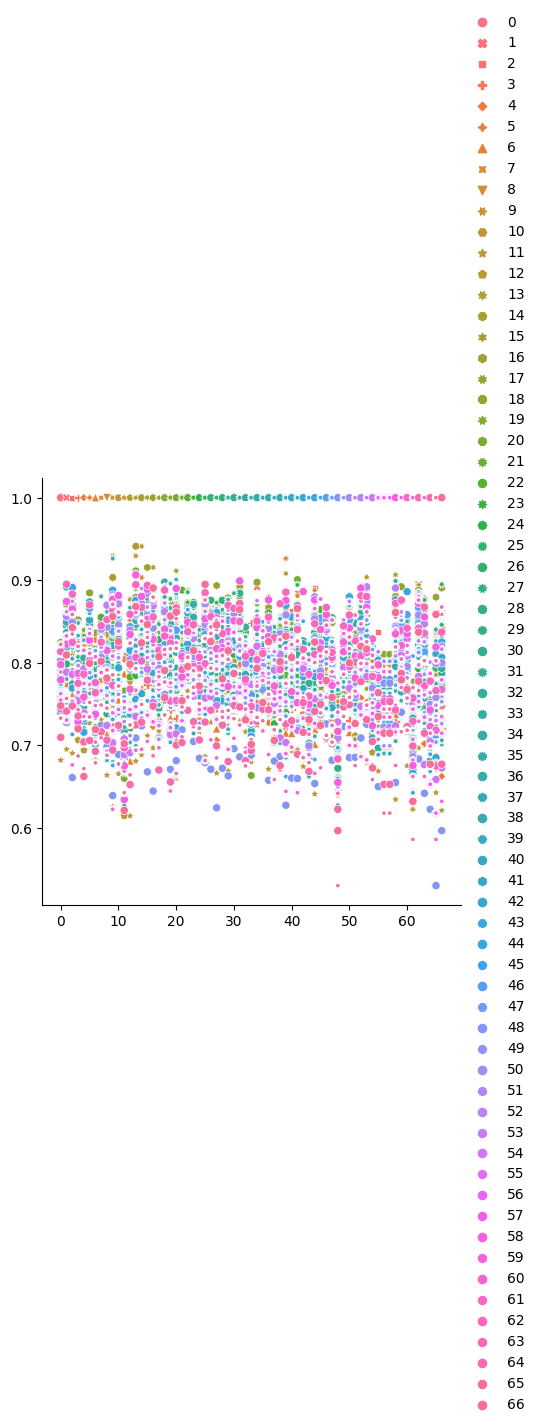

In [124]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame(similarity_matrix)
 
sns.relplot(data=data)

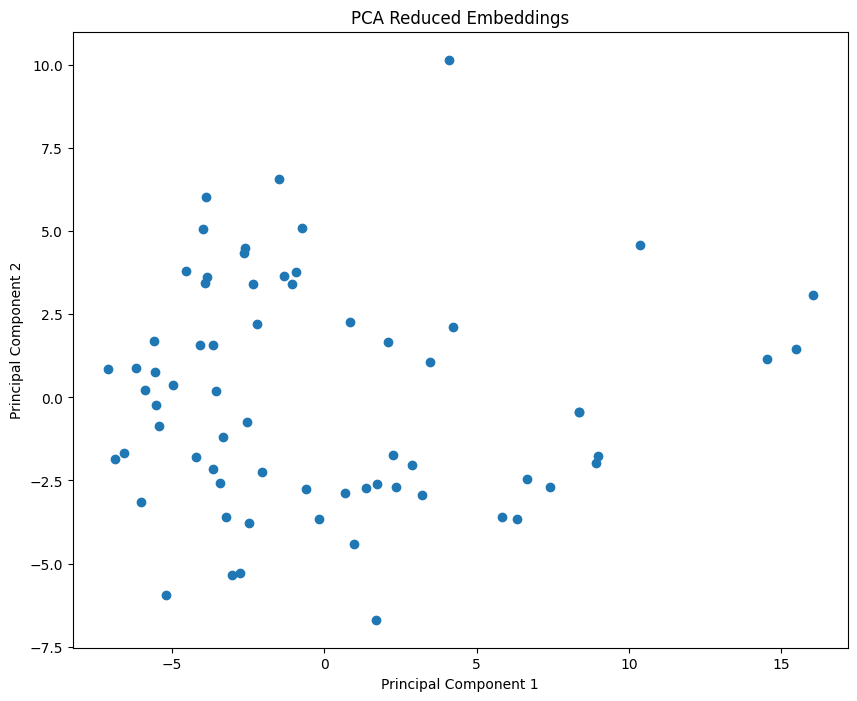

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(similarity_matrix)

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o')
plt.title("PCA Reduced Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [201]:
from sklearn.cluster import DBSCAN
from sklearn import metrics


dbscan = DBSCAN(eps=1.5, min_samples=1)
clusters = dbscan.fit_predict(reduced_embeddings)





In [202]:
# 查看每个簇的文章数量
import numpy as np
unique_labels = np.unique(clusters)
for label in unique_labels:
    n_articles = sum(clusters == label)
    print(f"Cluster {label}: {n_articles} articles")


Cluster 0: 4 articles
Cluster 1: 21 articles
Cluster 2: 4 articles
Cluster 3: 13 articles
Cluster 4: 2 articles
Cluster 5: 1 articles
Cluster 6: 10 articles
Cluster 7: 2 articles
Cluster 8: 1 articles
Cluster 9: 4 articles
Cluster 10: 1 articles
Cluster 11: 1 articles
Cluster 12: 1 articles
Cluster 13: 1 articles
Cluster 14: 1 articles


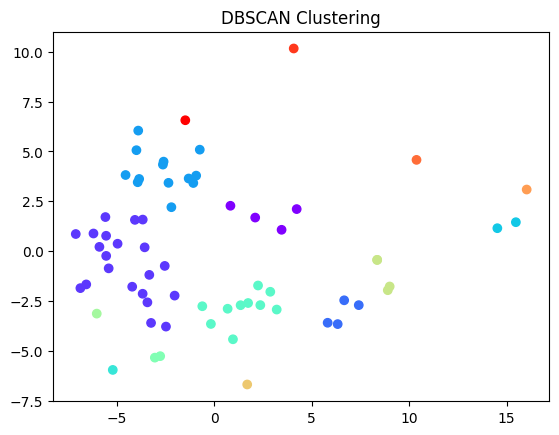

In [203]:
import matplotlib.pyplot as plt

# 绘制散点图
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()


In [204]:
clustered_list = {}
for cluster_id, article_id  in enumerate(clusters):
    if cluster_id not in clustered_list:
        clustered_list[cluster_id] = []

    clustered_list[cluster_id].append(article_id)

numC = 1
for cluster, n  in clustered_list.items():
    print("Cluster ", n[0]+1)
    print(cluster) 
    numC = numC+1
    

Cluster  1
0
Cluster  2
1
Cluster  2
2
Cluster  3
3
Cluster  3
4
Cluster  2
5
Cluster  3
6
Cluster  2
7
Cluster  4
8
Cluster  4
9
Cluster  2
10
Cluster  5
11
Cluster  4
12
Cluster  2
13
Cluster  2
14
Cluster  2
15
Cluster  2
16
Cluster  1
17
Cluster  6
18
Cluster  4
19
Cluster  4
20
Cluster  7
21
Cluster  8
22
Cluster  2
23
Cluster  7
24
Cluster  2
25
Cluster  2
26
Cluster  4
27
Cluster  7
28
Cluster  4
29
Cluster  2
30
Cluster  9
31
Cluster  7
32
Cluster  10
33
Cluster  2
34
Cluster  7
35
Cluster  2
36
Cluster  1
37
Cluster  4
38
Cluster  4
39
Cluster  4
40
Cluster  4
41
Cluster  7
42
Cluster  10
43
Cluster  4
44
Cluster  11
45
Cluster  2
46
Cluster  7
47
Cluster  12
48
Cluster  7
49
Cluster  2
50
Cluster  7
51
Cluster  2
52
Cluster  2
53
Cluster  3
54
Cluster  1
55
Cluster  10
56
Cluster  10
57
Cluster  2
58
Cluster  8
59
Cluster  7
60
Cluster  5
61
Cluster  2
62
Cluster  4
63
Cluster  13
64
Cluster  14
65
Cluster  15
66


    cluster  num
0         0    4
1         1   21
2         2    4
3         3   13
4         4    2
5         5    1
6         6   10
7         7    2
8         8    1
9         9    4
10       10    1
11       11    1
12       12    1
13       13    1
14       14    1


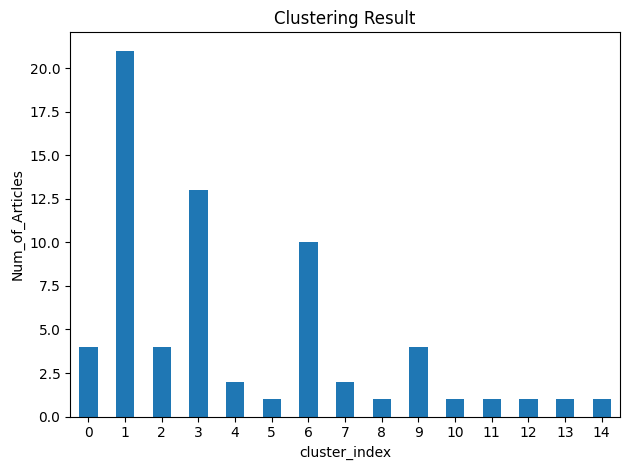

In [215]:
# 统计聚类情况
cluster_num = []
cluster_index = []
unique_labels = np.unique(clusters)
for label in unique_labels:
    n_articles = sum(clusters == label)
    cluster_index.append(label)
    cluster_num.append(n_articles)
import pandas as pd

data = {
    'cluster': cluster_index,
    'num': cluster_num
}

df = pd.DataFrame(data)

print(df)    

df.to_csv('C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_25_de_abril_publico/SB+DBS.csv', index=False)

import pandas as pd
import matplotlib.pyplot as plt


ax = df.plot(kind='bar', x='cluster', y='num', legend=False)


# 添加标题和标签
plt.title('Clustering Result')
plt.xlabel('cluster_index')
plt.ylabel('Num_of_Articles')
plt.xticks(rotation=0)  # 设置x轴标签的旋转角度

# 显示图形
plt.tight_layout()
plt.show()


In [206]:
import os
import re

folder_path = 'C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_25_de_abril_publico/time/'


# 日期格式
date_pattern = re.compile(r'\d{4}-\d{2}-\d{2}')
# 所有文章的对应日期信息
data_lists = []

count = 0
for count in range(len(outputs)):
    path = folder_path + str(count) + ".txt"
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        data_list = [line.strip() for line in lines if date_pattern.match(line.strip())]
        data_lists.append(data_list)


In [207]:
print(data_lists[0])

['2020-06-07', '2020-04-25', '2020-05-03']


In [208]:
# Extract data from TLS DATASET
import os
folder_path = "C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_25_de_abril_publico/input_docs"
import os

dct = []    # 用于存储文件名的列表

# 遍历当前目录的所有子目录
for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    # 如果是文件夹，则进一步遍历其下的文件
    if os.path.isdir(subdir_path):
        for file_name in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file_name)
            # 确保是文件而不是文件夹
            if os.path.isfile(file_path):
                # 打开文件并读取内容
                with open(file_path, 'r', encoding='utf-8') as file:
                    dct.append(file_name[0:10])

print(dct)

['2020-03-18', '2020-03-27', '2020-04-07', '2020-04-11', '2020-04-13', '2020-04-15', '2020-04-15', '2020-04-15', '2020-04-16', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-20', '2020-04-20', '2020-04-20', '2020-04-21', '2020-04-21', '2020-04-21', '2020-04-21', '2020-04-22', '2020-04-22', '2020-04-23', '2020-04-23', '2020-04-23', '2020-04-24', '2020-04-24', '2020-04-24', '2020-04-24', '2020-04-25', '2020-04-25', '2020-04-25', '2020-04-25', '2020-04-25', '2020-04-26', '2020-04-28', '2020-05-02', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-04', '2020-08-22', '2020-08-31', '2020-09-01', '2021-03-24', '2021-03-28', '2021-04-06', '2021-04-07', '2021-04-12', '2021-04-13', '2021-04-20', '2021-04-23', '2021-04-25', '2021-04-30', '2021-05-01', '2021-05-01', '2021-05-02', '2021-05-04', '2021-05-05', '2021-05-22', '2021-06-30', '2021-09-02', '2022-04-25', '2022-05-28', '2023-04-16', '2023-04-21']


In [209]:
count = 0
for count in range(len(outputs)):
    data_lists[count].append(dct[count])    
    
print(data_lists[0:5])


[['2020-06-07', '2020-04-25', '2020-05-03', '2020-03-18'], ['2020-03-27', '2020-03-25', '2020-04-01', '2020-03-27'], ['2020-04-07', '2020-04-07'], ['2020-03-17', '2020-04-11'], ['2020-04-13', '2020-04-13']]


In [210]:
date_all_cluster = []

for n, cluster in clustered_list.items():
    date_each_cluster = []
    for article_num in cluster:
        for date in data_lists[article_num]:
            date_each_cluster.append(date[0:10])
            
    # cluster的编号对应日期list        
    temp = []
    temp.append(n+1)
    temp.append(date_each_cluster)
    date_all_cluster.append(temp)
    
print(date_all_cluster[0])          

[1, ['2020-06-07', '2020-04-25', '2020-05-03', '2020-03-18']]


In [211]:
from collections import Counter
# 存取每个cluster对应的出现最多的日期和次数
set_of_cluster_date = []
for data in date_all_cluster:
    key = data[0]
    value = data[1]
    counter = Counter(value)
    most_common_element, count = counter.most_common(1)[0]
    print("CLUSTER : ", key)
    print(most_common_element)  
    print(count)  
    temp = {"cluster" : key, "date" : most_common_element, "count" : count}
    set_of_cluster_date.append(temp)

CLUSTER :  1
2020-06-07
1
CLUSTER :  2
2020-03-27
2
CLUSTER :  3
2020-03-27
2
CLUSTER :  4
2020-04-07
2
CLUSTER :  5
2020-04-07
2
CLUSTER :  6
2020-03-27
2
CLUSTER :  7
2020-04-07
2
CLUSTER :  8
2020-03-27
2
CLUSTER :  9
2020-03-17
1
CLUSTER :  10
2020-03-17
1
CLUSTER :  11
2020-03-27
2
CLUSTER :  12
2020-04-13
2
CLUSTER :  13
2020-03-17
1
CLUSTER :  14
2020-03-27
2
CLUSTER :  15
2020-03-27
2
CLUSTER :  16
2020-03-27
2
CLUSTER :  17
2020-03-27
2
CLUSTER :  18
2020-06-07
1
CLUSTER :  19
2020-04-15
3
CLUSTER :  20
2020-03-17
1
CLUSTER :  21
2020-03-17
1
CLUSTER :  22
2020-04-15
2
CLUSTER :  23
2020-04-25
1
CLUSTER :  24
2020-03-27
2
CLUSTER :  25
2020-04-15
2
CLUSTER :  26
2020-03-27
2
CLUSTER :  27
2020-03-27
2
CLUSTER :  28
2020-03-17
1
CLUSTER :  29
2020-04-15
2
CLUSTER :  30
2020-03-17
1
CLUSTER :  31
2020-03-27
2
CLUSTER :  32
2020-04-16
1
CLUSTER :  33
2020-04-15
2
CLUSTER :  34
2020-04-25
1
CLUSTER :  35
2020-03-27
2
CLUSTER :  36
2020-04-15
2
CLUSTER :  37
2020-03-27
2
CLUSTER : 

In [212]:
# 按照频率进行排序
sorted_list = sorted(set_of_cluster_date, key=lambda x: x['count'], reverse=True)

for item in sorted_list:
    print(item)

{'cluster': 19, 'date': '2020-04-15', 'count': 3}
{'cluster': 2, 'date': '2020-03-27', 'count': 2}
{'cluster': 3, 'date': '2020-03-27', 'count': 2}
{'cluster': 4, 'date': '2020-04-07', 'count': 2}
{'cluster': 5, 'date': '2020-04-07', 'count': 2}
{'cluster': 6, 'date': '2020-03-27', 'count': 2}
{'cluster': 7, 'date': '2020-04-07', 'count': 2}
{'cluster': 8, 'date': '2020-03-27', 'count': 2}
{'cluster': 11, 'date': '2020-03-27', 'count': 2}
{'cluster': 12, 'date': '2020-04-13', 'count': 2}
{'cluster': 14, 'date': '2020-03-27', 'count': 2}
{'cluster': 15, 'date': '2020-03-27', 'count': 2}
{'cluster': 16, 'date': '2020-03-27', 'count': 2}
{'cluster': 17, 'date': '2020-03-27', 'count': 2}
{'cluster': 22, 'date': '2020-04-15', 'count': 2}
{'cluster': 24, 'date': '2020-03-27', 'count': 2}
{'cluster': 25, 'date': '2020-04-15', 'count': 2}
{'cluster': 26, 'date': '2020-03-27', 'count': 2}
{'cluster': 27, 'date': '2020-03-27', 'count': 2}
{'cluster': 29, 'date': '2020-04-15', 'count': 2}
{'clust

In [213]:
# 确认 gold_standard 里面有几个时间
file_path = "C:/Users/25031/Desktop/新建文件夹/dataset_pt/txt/25_de_abril_publico/timelines/25_de_abril.txt"
separator = "--------------------------------"
with open(file_path, "r", encoding='utf-8') as file:
    content = file.read()
    
content = content.replace('\n', '')
data = content.split(separator)
pro_data = []
for d in data :
    if d != '':
        pro_data.append(d[0:10])
    
print(len(pro_data))

13


In [214]:
# 对比 gold_standard 和 聚类结果
num_of_tls = len(pro_data)

cluster = sorted_list[0:num_of_tls]

Golden = []
for clus in cluster :
    Golden.append(clus["date"])

print(len(Golden))    
print(num_of_tls) 

#print(Golden)    
#print(pro_data) 

set1 = set(Golden)
set2 = set(pro_data)

# 找出相同的日期
common_elements = set1 & set2

common_num = len(common_elements)

precision = common_num/num_of_tls
recall = common_num/num_of_tls
print("Precision : ", precision)

F1_score = (2*precision*recall)/(precision+recall)
print("F1 SCORE : ", F1_score)


13
13
Precision :  0.07692307692307693
F1 SCORE :  0.07692307692307693
